<a href="https://colab.research.google.com/github/SupriaBasak99/Facebook-Depression-Detection/blob/main/text_emotion_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import json
from time import sleep

In [ ]:
pip install langdetect

     |████████████████████████████████| 981 kB 25.5 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=6813e06858dbf9902867363a7a7a46083a50b476c09d7d266e276fd20a6051b2
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [ ]:
pip install transformers

     |████████████████████████████████| 3.4 MB 31.1 MB/s 
     |████████████████████████████████| 61 kB 582 kB/s 
     |████████████████████████████████| 596 kB 67.9 MB/s 
     |████████████████████████████████| 3.3 MB 41.8 MB/s 
     |████████████████████████████████| 895 kB 44.7 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
pip install umap-learn

     |████████████████████████████████| 86 kB 4.5 MB/s 
     |████████████████████████████████| 1.1 MB 42.5 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82709 sha256=c8ba2ff8d6a3f7f95341b8ea197bb8af0b269a34d5bfcf74e3c5c2b4543a62c0
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52603 sha256=7197f183d803d862f7326e4f0fd8a71c72bec51e169ff366f14154b8028354e7
  Stored in directory: /root/.cache/pip/wheels/af/e9/33/04db1436df0757c42fda8ea6796d7a8586e23c85fac355f476
Successfully built umap-learn pynndescent


In [ ]:
pip install hdbscan

     |████████████████████████████████| 6.4 MB 14.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.27-cp37-cp37m-linux_x86_64.whl size=2311926 sha256=4553febeb28a007537bd3c32d9f9d807fa7419a270307d7e15d676be97c437f9
  Stored in directory: /root/.cache/pip/wheels/73/5f/2f/9a259b84003b84847c259779206acecabb25ab56f1506ee72b
Successfully built hdbscan


In [ ]:
pip install numba

In [ ]:
from umap import UMAP
from hdbscan import HDBSCAN

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from textblob import TextBlob
import collections
import langdetect 

In [ ]:
from gensim.models import Word2Vec, KeyedVectors
import gensim.downloader as api
import gensim

In [ ]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer, FeatureHasher
from sklearn.feature_extraction import DictVectorizer
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import silhouette_score
from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model, load_model

In [ ]:
import transformers as ppb 

In [ ]:
who_data = pd.read_csv("/content/drive/MyDrive/Dataset for Depression Analysis(Facebook)/FACEBOOK DATASET (Main)/who.csv", 
                          sep=';')

In [ ]:
who_data.isnull().mean()

level                            0.000000
id                               0.000000
parent_id                        0.000000
object_id                        0.000000
object_type                      0.000000
object_key                       0.038985
query_status                     0.000140
query_time                       0.000000
query_type                       0.000000
message                          0.048521
from                             0.038985
created_time                     0.038985
updated_time                     0.038985
full_picture                     0.056233
comments.summary.total_count     0.038985
shares.count                     0.060581
reactions.summary.total_count    0.038985
like.summary.total_count         0.038985
love.summary.total_count         0.038985
wow.summary.total_count          0.038985
haha.summary.total_count         0.038985
sad.summary.total_count          0.038985
angry.summary.total_count        0.038985
dtype: float64

In [ ]:
who_data.head()

level  id  ... sad.summary.total_count angry.summary.total_count
0      0   1  ...                     NaN                       NaN
1      1  14  ...                  4047.0                    1652.0
2      1  15  ...                    20.0                      57.0
3      1  16  ...                  3370.0                    1712.0
4      1  17  ...                  1744.0                    1100.0

[5 rows x 23 columns]

In [ ]:
who_data.columns

Index(['level', 'id', 'parent_id', 'object_id', 'object_type', 'object_key',
       'query_status', 'query_time', 'query_type', 'message', 'from',
       'created_time', 'updated_time', 'full_picture',
       'comments.summary.total_count', 'shares.count',
       'reactions.summary.total_count', 'like.summary.total_count',
       'love.summary.total_count', 'wow.summary.total_count',
       'haha.summary.total_count', 'sad.summary.total_count',
       'angry.summary.total_count'],
      dtype='object')

In [ ]:
who_data = who_data[['message','reactions.summary.total_count','like.summary.total_count',
       'love.summary.total_count', 'wow.summary.total_count',
       'haha.summary.total_count', 'sad.summary.total_count',
       'angry.summary.total_count']]
who_data.head()

message  ...  angry.summary.total_count
0                                                NaN  ...                        NaN
1  Vaccine equity is 🗝️ to ending the COVID-19 pa...  ...                     1652.0
2  LIVE Q&A on COVID-19 with Dr Mike Ryan and Dr ...  ...                       57.0
3  “The global failure to share vaccines equitabl...  ...                     1712.0
4  Getting vaccinated against COVID-19 helps prot...  ...                     1100.0

[5 rows x 8 columns]

In [ ]:
pip install emot

     |████████████████████████████████| 61 kB 21 kB/s 


In [ ]:
import re
import emot
from emot.emo_unicode import UNICODE_EMOJI, EMOTICONS_EMO

In [ ]:
import spacy

In [ ]:
en_nlp = spacy.load('en_core_web_sm')

In [ ]:
pip install treelib

  Created wheel for treelib: filename=treelib-1.6.1-py3-none-any.whl size=18386 sha256=5007306c9d9c7c68102fbf5ef70e62f25d3b5e87dcbc5a8f61c2f664b952befa
  Stored in directory: /root/.cache/pip/wheels/89/be/94/2c6d949ce599d1443426d83ba4dc93cd35c0f4638260930a53
Successfully built treelib


In [ ]:
from treelib import Node, Tree

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('sentiwordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/sentiwordnet.zip.


In [ ]:
stop_words = list(set(stopwords.words('english')))

In [ ]:
def convert_emojis(text):
    for emot in UNICODE_EMOJI:
        text = text.replace(emot, "_".join(UNICODE_EMOJI[emot].replace(",","").replace(":","").split()))
    return text

In [ ]:
def convert_emoticons(text):
    for emot in EMOTICONS_EMO:
        text = text.replace(emot, "_".join(EMOTICONS_EMO[emot].replace(",","").split()))
    return text

In [ ]:
def POS_tagging(text):
    res = []
    for word in text:
      if(word in stop_words):
        res.append([word,"ST"])
      else:
        res.append([word,"NST"])
    return res

In [ ]:
def myPOS_tagging(text):
  text = " ".join(text)
  wordsList = nltk.word_tokenize(text)
  word_tag_dict = {}
  for word,tag in nltk.pos_tag(wordsList):
    word_tag_dict[word] = tag
  return word_tag_dict

In [ ]:
def detectLanguage(text):
  try:
    language = langdetect.detect(text)
    return language
  except:
    language = 'error'
    return language

In [ ]:
def tree_traversal(sent):
    current = sent.root
    stack = [] # initialize stack
    done = 0
    while True:
        if current is not None:
            stack.append(current)
            for child in current.children:
                stack.append(child)
            current = stack[-1]
        elif(stack):
            current = stack.pop()
            print(tok_format(current), end=" ") # Python 3 printing
#             current = current.right
 
        else:
            break

In [ ]:
def tok_format(tok):
    return "_".join([tok.orth_, tok.tag_, tok.dep_])


def to_nltk_tree(node,list_toks):
    if node.n_lefts + node.n_rights > 0:
        list_toks.append(tok_format(node))
        for child in node.children:
            to_nltk_tree(child,list_toks)
#         return Tree(tok_format(node), [to_nltk_tree(child) for child in node.children])
    else:
        list_toks.append(tok_format(node))


In [ ]:
who_data = who_data.dropna()

In [ ]:
def preprocess_text(text):
  text = convert_emojis(text)
  text = convert_emoticons(text)
  text = text.lower()
  text = word_tokenize(text)
  text = nltk.pos_tag(text)
  res = []
  lemmatizer = WordNetLemmatizer()
  for word, tag in text:
    wntag = tag[0].lower()
    wntag = wntag if wntag in ['a', 'r', 'n', 'v'] else None
    if not wntag:
      lemma = word
    else:
      lemma = lemmatizer.lemmatize(word, wntag)
    res.append(lemma)
  res = POS_tagging(res)
  return res

In [ ]:
model = KeyedVectors.load_word2vec_format("/content/drive/MyDrive/Word2Vec/GoogleNews-vectors-negative300.bin", binary=True)

In [ ]:
def word_mover_distance(compare_text, base_text):
  return model.wmdistance(compare_text, base_text)

In [ ]:
def vectorize(list_of_docs, model):
  features=[]

  for tokens in list_of_docs:
    zero_vector = np.zeros(model.vector_size)
    vectors=[]
    for token in tokens:
      if token in model.wv:
        try:
          vectors.append(model.wv[token])
        except KeyError:
          continue
    if vectors:
      vectors = np.asarray(vectors)
      avg_vec = vectors.mean(axis=0)
      features.append(avg_vec)
      #return avg_vec
    else:
      #return zero_vector
      features.append(zero_vector)
  return features

In [ ]:
who_data['message_preprocessed'] = who_data['message'].apply(lambda x: preprocess_text(x))

In [ ]:
who_data.head()

message  ...                               message_preprocessed
1  Vaccine equity is 🗝️ to ending the COVID-19 pa...  ...  [[vaccine, NST], [equity, NST], [be, ST], [old...
2  LIVE Q&A on COVID-19 with Dr Mike Ryan and Dr ...  ...  [[live, NST], [q, NST], [&, NST], [a, ST], [on...
3  “The global failure to share vaccines equitabl...  ...  [[“, NST], [the, ST], [global, NST], [failure,...
4  Getting vaccinated against COVID-19 helps prot...  ...  [[get, NST], [vaccinate, NST], [against, ST], ...
5  If you are living with diabetes, what is the r...  ...  [[if, ST], [you, ST], [be, ST], [live, NST], [...

[5 rows x 9 columns]

In [ ]:
def jaccard_similarity_custom(text):
  res = []
  for i in range(0,len(text)):
    temp = []
    for j in range(0,len(text)):
      temp1 = []
      temp1.append(text[i][0])
      temp1.append(text[i][1])
      sim = nltk.jaccard_distance(set(text[i][0]),set(text[j][0]))
      temp1.append(sim)
      temp.append(temp1)
    res.append(temp)
  return res

In [ ]:
var = jaccard_similarity_custom(who_data['message_preprocessed'].iloc[0])
var

[[['vaccine', 'NST', 0.0],
  ['vaccine', 'NST', 0.8],
  ['vaccine', 'NST', 0.8571428571428571],
  ['vaccine', 'NST', 0.9230769230769231],
  ['vaccine', 'NST', 1.0],
  ['vaccine', 'NST', 0.7142857142857143],
  ['vaccine', 'NST', 0.875],
  ['vaccine', 'NST', 0.7272727272727273],
  ['vaccine', 'NST', 0.4444444444444444],
  ['vaccine', 'NST', 1.0],
  ['vaccine', 'NST', 0.9090909090909091],
  ['vaccine', 'NST', 1.0]],
 [['equity', 'NST', 0.8],
  ['equity', 'NST', 0.0],
  ['equity', 'NST', 0.8571428571428571],
  ['equity', 'NST', 0.8333333333333334],
  ['equity', 'NST', 0.8571428571428571],
  ['equity', 'NST', 0.875],
  ['equity', 'NST', 0.7142857142857143],
  ['equity', 'NST', 0.9230769230769231],
  ['equity', 'NST', 0.8333333333333334],
  ['equity', 'NST', 1.0],
  ['equity', 'NST', 0.8],
  ['equity', 'NST', 1.0]],
 [['be', 'ST', 0.8571428571428571],
  ['be', 'ST', 0.8571428571428571],
  ['be', 'ST', 0.0],
  ['be', 'ST', 0.8888888888888888],
  ['be', 'ST', 1.0],
  ['be', 'ST', 0.75],
  ['be

In [ ]:
who_data['message_preprocessed'].iloc[2]

[['“', 'NST'],
 ['the', 'ST'],
 ['global', 'NST'],
 ['failure', 'NST'],
 ['to', 'ST'],
 ['share', 'NST'],
 ['vaccine', 'NST'],
 ['equitably', 'NST'],
 ['be', 'ST'],
 ['fuel', 'NST'],
 ['a', 'ST'],
 ['two-track', 'NST'],
 ['covid-19', 'NST'],
 ['pandemic', 'NST'],
 ['and', 'ST'],
 ['take', 'NST'],
 ['a', 'ST'],
 ['toll', 'NST'],
 ['on', 'ST'],
 ['some', 'ST'],
 ['of', 'ST'],
 ['the', 'ST'],
 ['globe_showing_europe-africa', 'NST'],
 ['’', 'NST'],
 ['s', 'ST'],
 ['poorest', 'NST'],
 ['and', 'ST'],
 ['most', 'ST'],
 ['vulnerable', 'NST'],
 ['people', 'NST'],
 ['.', 'NST'],
 ['vaccine', 'NST'],
 ['donate', 'NST'],
 ['next', 'NST'],
 ['year', 'NST'],
 ['will', 'ST'],
 ['be', 'ST'],
 ['far', 'NST'],
 ['too', 'ST'],
 ['late', 'NST'],
 ['for', 'ST'],
 ['those', 'ST'],
 ['die', 'NST'],
 ['today', 'NST'],
 [',', 'NST'],
 ['be', 'ST'],
 ['infect', 'NST'],
 ['today', 'NST'],
 [',', 'NST'],
 ['or', 'ST'],
 ['at', 'ST'],
 ['risk', 'NST'],
 ['today', 'NST'],
 ['”', 'NST'],
 ['-', 'NST'],
 ['tedros', '

In [ ]:
who_data['language'] = who_data['message'].apply(lambda x : detectLanguage(x))

In [ ]:
base_text = who_data['message_lemmatized'].iloc[who_data['sad.summary.total_count'].argmax()]
who_data['WMD_wrt_base_text'] = who_data['message_lemmatized'].apply(lambda x: word_mover_distance(x,base_text))

In [ ]:
res = vectorize(who_data['message_lemmatized'],model)
res

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  # Remove the CWD from sys.path while we load stuff.


[array([-6.19079582e-02, -1.47485346e-01,  2.48168949e-02,  2.30859369e-01,
        -4.04785164e-02, -1.65039062e-01,  1.85256954e-02, -1.78613275e-01,
         3.00488293e-01, -4.94445786e-02,  4.42382805e-02, -1.55773923e-01,
         1.69433597e-02,  4.62402329e-02, -3.05065930e-01,  1.74902350e-01,
         9.97558609e-02,  2.47021481e-01,  5.81054688e-02, -7.08496124e-02,
         1.86035149e-02,  6.88964874e-02,  1.30468756e-01, -7.70507827e-02,
         1.92187503e-01,  4.44335938e-02,  2.32910160e-02, -1.39965817e-01,
         1.09863281e-01,  8.03222656e-02, -1.36523440e-01, -1.17968753e-01,
         1.20654300e-01, -8.74917954e-02, -9.68261734e-02,  7.74414092e-02,
         2.18994133e-02, -2.01171879e-02,  1.29150394e-02,  2.28808597e-01,
         4.53613289e-02, -1.48925781e-02, -5.72875962e-02,  2.44140629e-05,
        -2.47851565e-01, -4.58251946e-02,  3.79516594e-02,  3.95019539e-02,
         1.99218746e-02,  5.19287102e-02,  1.59960940e-01, -1.17187500e-02,
        -2.7

In [ ]:
temp = np.asarray(res)
temp.shape

(6785, 300)

In [ ]:
who_data = who_data.drop(who_data[who_data['WMD_wrt_base_text'] == float('inf')].index)

In [ ]:
who_data['message_lemmatized_text'] = [" ".join(x) for x in who_data['message_lemmatized']]

In [ ]:
who_data['word_count'] = who_data['message_lemmatized_text'].apply(lambda x : len(str(x).split(" ")))
who_data['char_count'] = who_data['message_lemmatized_text'].apply(lambda x : sum(len(word) for word in str(x).split(" ")))
who_data['sentence_count'] = who_data['message'].apply(lambda x: len(str(x).split(".")))
who_data['avg_word_length'] = who_data['char_count']/who_data['word_count']
who_data['avg_sentence_length'] = who_data['word_count']/who_data['sentence_count']

In [ ]:
who_data = who_data[who_data['language'] == 'en']

In [ ]:
who_data['sentiment'] = who_data['message'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [ ]:
## tag text and exctract tags into a list
who_data["tags"] = who_data["message"].apply(lambda x: [(tag.text, tag.label_) 
                                for tag in en_nlp(x).ents] )
## utils function to count the element of a list
def utils_lst_count(lst):
    dic_counter = collections.Counter()
    for x in lst:
        dic_counter[x] += 1
    dic_counter = collections.OrderedDict( 
                     sorted(dic_counter.items(), 
                     key=lambda x: x[1], reverse=True))
    lst_count = [ {key:value} for key,value in dic_counter.items() ]
    return lst_count

## count tags
who_data["tags"] = who_data["tags"].apply(lambda x: utils_lst_count(x))

## utils function create new column for each tag category
def utils_ner_features(lst_dics_tuples, tag):
    if len(lst_dics_tuples) > 0:
        tag_type = []
        for dic_tuples in lst_dics_tuples:
            for tuple in dic_tuples:
                type, n = tuple[1], dic_tuples[tuple]
                tag_type = tag_type + [type]*n
                dic_counter = collections.Counter()
                for x in tag_type:
                    dic_counter[x] += 1
        return dic_counter[tag]
    else:
        return 0

## extract features
tags_set = []
for lst in who_data["tags"].tolist():
     for dic in lst:
          for k in dic.keys():
              tags_set.append(k[1])
tags_set = list(set(tags_set))
for feature in tags_set:
     who_data["tags_"+feature] = who_data["tags"].apply(lambda x: 
                             utils_ner_features(x, feature))

In [ ]:
who_data.head()

message  ...  tags_GPE
1  Vaccine equity is 🗝️ to ending the COVID-19 pa...  ...         0
2  LIVE Q&A on COVID-19 with Dr Mike Ryan and Dr ...  ...         0
3  “The global failure to share vaccines equitabl...  ...         0
4  Getting vaccinated against COVID-19 helps prot...  ...         0
5  If you are living with diabetes, what is the r...  ...         0

[5 rows x 38 columns]

In [ ]:
who_data['message_lemmatized_text'].iloc[2]

'global failure share vaccines equitably fuelling twotrack covid pandemic taking toll globe_showing_EuropeAfricas poorest vulnerable people vaccines donated next year far late dying today infected today risk today tedros adhanom ghebreyesus'

In [ ]:
def get_numeric_data(df):
  return df.select_dtypes(exclude=['object'])

In [ ]:
numeric_transformer = FunctionTransformer(get_numeric_data, validate=False)
#text_transformer = FunctionTransformer(lambda x : x['message_lemmatized'],validate=False)
text_vectorizer = FunctionTransformer(vectorize)

In [ ]:
class Word2VecVectorizer(BaseEstimator, TransformerMixin):
  def __init__(self, feature, model):
    self.feature = feature
    self.model = model

  def fit(self, X, y = None):
    return self
  
  def transform(self, X, y = None):
    features=[]

    for tokens in X[self.feature]:
      zero_vector = np.zeros(model.vector_size)
      vectors=[]
      for token in tokens:
        if token in model.wv:
          try:
            vectors.append(model.wv[token])
          except KeyError:
            continue
      if vectors:
        vectors = np.asarray(vectors)
        avg_vec = vectors.mean(axis=0)
        features.append(avg_vec)
        #return avg_vec
      else:
        #return zero_vector
        features.append(zero_vector)
    return np.asarray(features)


In [ ]:
class TfidfVectorizerClass(BaseEstimator, TransformerMixin):
  def __init__(self, feature):
    self.feature = feature

  def fit(self, X, y = None):
    return self
  
  def transform(self, X, y = None):
    tfid = TfidfVectorizer()
    res = tfid.fit_transform(X[self.feature])
    return res.toarray()

In [ ]:
class BERTVectorizer(BaseEstimator, TransformerMixin):
  def __init__(self, feature, max_length = 512):
    self.feature = feature
    self.max_length = max_length
  
  def fit(self, X, y = None):
    return self
  
  def transform(self, X, y = None):
    model_class, tokenizer_class, pretrained_weights = (ppb.BertModel, ppb.BertTokenizer, 'bert-base-uncased')
    tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
    model = model_class.from_pretrained(pretrained_weights)
    tokenized = []
    for x in X[self.feature]:
      sent_tokenized = tokenizer.encode_plus(x, add_special_tokens=True, pad_to_max_length=True, max_length=self.max_length, truncation = True)['input_ids']
      tokenized.append(sent_tokenized)
    return np.array(tokenized)

In [ ]:
class POSVectorizer(BaseEstimator, TransformerMixin):
  def __init__(self, feature, n_features):
    self.feature = feature
    self.n_features = n_features

  def fit(self, X, y = None):
    return self
  
  def transform(self, X, y = None):
    posVect = FeatureHasher(n_features = self.n_features)
    v = posVect.fit_transform(X[self.feature])
    return v.toarray()

In [ ]:
def BertVec(df):
    model_class, tokenizer_class, pretrained_weights = (ppb.BertModel, ppb.BertTokenizer, 'bert-base-uncased')
    tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
    model = model_class.from_pretrained(pretrained_weights)
    tokenized = []
    for x in df:
      sent_tokenized = tokenizer.encode_plus(x, add_special_tokens=True, pad_to_max_length=True, max_length=512, truncation = True)['input_ids']
      tokenized.append(sent_tokenized)
    return tokenized

In [ ]:
res = BertVec(who_data['message_lemmatized_text'].tolist())
np.array(res)

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2227: FutureWarning: The `pad_to_max_length` argument is deprecated and will

array([[  101, 17404, 10067, ...,     0,     0,     0],
       [  101,  2444,  1053, ...,     0,     0,     0],
       [  101,  3795,  4945, ...,     0,     0,     0],
       ...,
       [  101,  2651,  2248, ...,     0,     0,     0],
       [  101, 18414,  5302, ...,     0,     0,     0],
       [  101,  2088,  2740, ...,     0,     0,     0]])

In [ ]:
v = FeatureHasher(n_features=10)
temp2 = v.fit_transform(who_data['POS_tags'])
temp2.toarray().shape

(6778, 10)

In [ ]:
numeric_pipeline = Pipeline([
                             ('selector', numeric_transformer),
                             ('scaler', StandardScaler())
])

text_pipeline = Pipeline([
                          #('selector', text_transformer),
                          ('Word2VecVectorizer', Word2VecVectorizer('message_lemmatized',model)),
                          #('TfidVectorizer', TfidfVectorizerClass('message_lemmatized_text')),
                          #('BERTVectorizer', BERTVectorizer('message_lemmatized_text')),
])

pos_pipeline = Pipeline([
                         ('POSVectorizer', POSVectorizer('POS_tags',8))
])

In [ ]:
join_numeric_text_features = FeatureUnion(
    transformer_list = [
                        ('text_features', text_pipeline),
                        #('pos_features', pos_pipeline),
                        ('numeric_features', numeric_pipeline)
    ])

In [ ]:
temp = text_pipeline.fit_transform(who_data)
temp.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).


(6785, 300)

In [ ]:
temp1 = numeric_pipeline.fit_transform(who_data)
temp1

array([[ 2.14108738,  1.83120115,  2.39173715, ..., 18.63112337,
         1.7969588 ,  2.25342038],
       [-0.20893562, -0.21376306, -0.02808426, ..., -0.07430634,
        -0.07396994, -0.09320564],
       [ 3.30766917,  3.2937442 ,  2.21400094, ...,  2.55111695,
         1.4824272 ,  2.34169471],
       ...,
       [-0.28055329, -0.27963114, -0.23788908, ..., -0.14194908,
        -0.08326186, -0.17706626],
       [-0.28060565, -0.27968583, -0.23788908, ..., -0.14194908,
        -0.08326186, -0.17706626],
       [-0.28057074, -0.27965849, -0.23761731, ..., -0.14194908,
        -0.08326186, -0.17706626]])

In [ ]:
temp2 = pos_pipeline.fit_transform(who_data)
temp2.shape

(6785, 8)

In [ ]:
cluster_pipe = Pipeline([
                         ('union', join_numeric_text_features),
                         #('dimension_reduction', UMAP(n_neighbors=10, n_components=5, metric='cosine'))
                         #('GaussianMixture', GaussianMixture(n_components=2, random_state=42))
])

In [ ]:
X_preprocessed = cluster_pipe.fit_transform(who_data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).


In [ ]:
encoding_dim = 100
input_df = Input(shape = (X_preprocessed.shape[1],))
x = Dense(encoding_dim, activation='relu')(input_df)
x = Dense(500, activation='relu', kernel_initializer='glorot_uniform')(x)
x = Dense(500, activation='relu', kernel_initializer='glorot_uniform')(x)
x = Dense(2000, activation='relu', kernel_initializer='glorot_uniform')(x)

encoded = Dense(2, activation='relu', kernel_initializer='glorot_uniform')(x)
x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(encoded)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
decoded = Dense(X_preprocessed.shape[1], kernel_initializer = 'glorot_uniform')(x)

autoencoder = Model(input_df, decoded)

encoder = Model(input_df, encoded)

autoencoder.compile(optimizer= 'adam', loss='mean_squared_error')

In [ ]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 307)]             0         
                                                                 
 dense (Dense)               (None, 100)               30800     
                                                                 
 dense_1 (Dense)             (None, 500)               50500     
                                                                 
 dense_2 (Dense)             (None, 500)               250500    
                                                                 
 dense_3 (Dense)             (None, 2000)              1002000   
                                                                 
 dense_4 (Dense)             (None, 2)                 4002      
                                                                 
 dense_5 (Dense)             (None, 2000)              6000  

In [ ]:
autoencoder.fit(X_preprocessed, X_preprocessed, batch_size=64, epochs=25, verbose=1)

Epoch 1/25
107/107 [==============================] - 4s 27ms/step - loss: 0.0160
Epoch 2/25
107/107 [==============================] - 3s 26ms/step - loss: 0.0135
Epoch 3/25
107/107 [==============================] - 3s 27ms/step - loss: 0.0130
Epoch 4/25
107/107 [==============================] - 3s 26ms/step - loss: 0.0130
Epoch 5/25
107/107 [==============================] - 3s 27ms/step - loss: 0.0147
Epoch 6/25
107/107 [==============================] - 3s 25ms/step - loss: 0.0129
Epoch 7/25
107/107 [==============================] - 3s 26ms/step - loss: 0.0125
Epoch 8/25
107/107 [==============================] - 3s 32ms/step - loss: 0.0129
Epoch 9/25
107/107 [==============================] - 3s 26ms/step - loss: 0.0127
Epoch 10/25
107/107 [==============================] - 3s 27ms/step - loss: 0.0121
Epoch 11/25
107/107 [==============================] - 3s 26ms/step - loss: 0.0121
Epoch 12/25
107/107 [==============================] - 3s 26ms/step - loss: 0.0121
Epoch 13/25
1

In [ ]:
X_encoded = encoder.predict(X_preprocessed)

In [ ]:
X_encoded.shape

(6785, 2)

In [ ]:
X_preprocessed.shape

(6785, 307)

In [ ]:
clustering_model = KMeans(n_clusters=2)

In [ ]:
preds = clustering_model.fit_predict(X_preprocessed)

In [ ]:
preds.shape

(6785,)

In [ ]:
silhouette_score(X_preprocessed, preds)

0.802903282171558

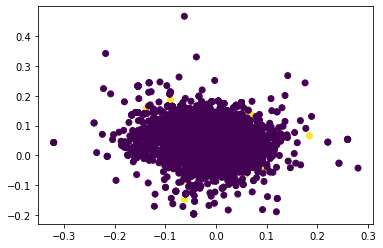

In [ ]:
plt.scatter(X_preprocessed[:,0], X_preprocessed[:,1], c=preds)

In [ ]:
preds = pd.DataFrame(preds)
preds.head()

0
0  1
1  0
2  1
3  1
4  0

In [ ]:
preds[0].value_counts()

0    6492
1     293
Name: 0, dtype: int64

In [ ]:
who_data.head()

message  ...  tags_GPE
1  Vaccine equity is 🗝️ to ending the COVID-19 pa...  ...         0
2  LIVE Q&A on COVID-19 with Dr Mike Ryan and Dr ...  ...         0
3  “The global failure to share vaccines equitabl...  ...         0
4  Getting vaccinated against COVID-19 helps prot...  ...         0
5  If you are living with diabetes, what is the r...  ...         0

[5 rows x 38 columns]

In [ ]:
def penn_to_wn(tag):
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB
    return None

In [ ]:
def get_sentiment(word,tag):
    wn_tag = penn_to_wn(tag)
    
    if wn_tag not in (wn.NOUN, wn.ADJ, wn.ADV):
        return []

    #Lemmatization
    lemma = lemmatizer.lemmatize(word, pos=wn_tag)
    if not lemma:
        return []
    synsets = wn.synsets(word, pos=wn_tag)
    if not synsets:
        return []

    # Take the first sense, the most common
    synset = synsets[0]
    swn_synset = swn.senti_synset(synset.name())

    return [synset.name(), swn_synset.pos_score(),swn_synset.neg_score(),swn_synset.obj_score()]

In [ ]:
def get_sentiment_score(pos_val):
  pos=neg=0
  senti_val = [get_sentiment(x,y) for (x,y) in pos_val]
  for score in senti_val:
        try:
            pos = pos + score[1]  #positive score is stored at 2nd position
            neg = neg + score[2]  #negative score is stored at 3rd position
        except:
            continue
  return pos - neg

In [ ]:
def getSentimentValue(score):
  if(score>0):
    return 1
  else:
    return 0

In [ ]:
who_data['senti_score'] = who_data['POS_tags'].apply(lambda x: get_sentiment_score(x))

In [ ]:
who_data['Sentiment'] = who_data['senti_score'].apply(lambda x: getSentimentValue(x))

In [ ]:
who_data.head()

message  ...  Sentiment
1  Vaccine equity is 🗝️ to ending the COVID-19 pa...  ...          0
2  LIVE Q&A on COVID-19 with Dr Mike Ryan and Dr ...  ...          0
3  “The global failure to share vaccines equitabl...  ...          0
4  Getting vaccinated against COVID-19 helps prot...  ...          0
5  If you are living with diabetes, what is the r...  ...          1

[5 rows x 14 columns]

In [ ]:
silhouette_score(temp,who_data['Sentiment'])

0.032146344053071804

In [ ]:
who_data['labels'].value_counts()

0    6206
1     572
Name: labels, dtype: int64

In [ ]:
who_data['Sentiment'].value_counts()

Positive    3683
Negative    3095
Name: Sentiment, dtype: int64

In [ ]:
command = "Submit debug logs to a good project lead quickly today at 9:00 AM"
en_doc = en_nlp(u'' + command) 

# [to_nltk_tree(sent.root).pretty_print() for sent in en_doc.sents]
for sent in en_doc.sents:
    tok_list = []
    to_nltk_tree(sent.root,tok_list)
#     print(tok_list)
    for each in tok_list:
        print(each,spacy.explain(each.split("_")[1]))

Submit_VB_ROOT verb, base form
debug_NN_dobj noun, singular or mass
logs_VBZ_dobj verb, 3rd person singular present
to_IN_prep conjunction, subordinating or preposition
lead_NN_pobj noun, singular or mass
project_NN_compound noun, singular or mass
a_DT_det determiner
good_JJ_amod adjective
quickly_RB_advmod adverb
today_NN_npadvmod noun, singular or mass
at_IN_prep conjunction, subordinating or preposition
AM_NN_pobj noun, singular or mass
9:00_CD_nummod cardinal number


In [ ]:
def syntactic_dependency_parsing(text):
    en_doc = en_nlp(u''+text)
    parsed_list = []
    for sent in en_doc.sents:
        temp_parsed_list = []
        to_nltk_tree(sent.root,temp_parsed_list)
        parsed_list = parsed_list + temp_parsed_list
    return parsed_list

In [ ]:
def get_list_of_NAVA_words(tokens_list):
    '''NOUN-ADJECTIVE-VERB-ADVERB words'''
    list_of_NAVA_words = []
    for each in tokens_list:
        explanation_str = spacy.explain(each.split("_")[1])
        if(explanation_str.find('noun') != -1 or explanation_str.find('adjective') != -1 or 
           explanation_str.find('verb') != -1 or explanation_str.find('adverb') != -1):
            list_of_NAVA_words.append(each.split("_")[0])
    return list_of_NAVA_words

### To do: 
### Use WordNet-Affect to get emotion of each NAVA word
### Using this vector and context to get semantic emotion

In [ ]:
f = open('dataset_ig_0.json')
data = json.load(f)
for i in data:
    img_caption = i['p_image_caption']
    img_caption = convert_emojis(img_caption)
    img_caption = convert_emoticons(img_caption)
    img_caption_parsed_tokens = syntactic_dependency_parsing(img_caption)
    img_caption_NAVA_words = get_list_of_NAVA_words(img_caption_parsed_tokens)
    

A beautiful clip full of energy
.............ـــــــــــــ............
Sometimes God wants to take the hand of his other servants with your hand
When you lend a helping hand,
Know that your other hand is in God's hand ...
گاهی خدا می خواهد با دست تو دست دیگر بندگانش را بگیرد
وقتی دستی را به یاری می گیری،
بدان که دست دیگرت در دست خداست...

#helping #help #love #helpingothers #like #charity #donation #donate #dogsofinstagram #support #venezuela #helpinghands #donated #covid #repost #donations #community #helpothers #food #doginneed #dona #rescuedogs #gay #follow #adoptnotshop #homelessdogs #helpingpeople #motivation #kindness #urgentdogs
Pues ya estamos. Ahora a esperar que no me haga efectos secundarios. Que domingo más raro en vez de ir a tomar algo vacuna. Y contenta. Después de esto vendrá la división de la@poblacion en secciones como la peli Divergente. Estaremos los de Moderna yeah, los Pfizer, los Astra, los Jansen. Un buen guion para una serie post pandemia para Netflix. El humor